A partir del excel "salarios.xlsx" ubicado en la carpeta "data" hacer el siguiente gráfico usando plotly:
- En el eje X debería de estar la columna de fecha
- En el eje Y deberían de estar las series como traces de Scatter. No olvidarse de nombrarlas. 
  - La trace "Total índice de salarios" debería tener un mode = "lines + markers"
- El eje y debería:
  - Tener un decimal
  - un título que diga "índice 2016 = 100"
  - Debería tener los separadores de miles con "." y de decimales con "," (acordarse que también debe modificarse el layout)
- La leyenda debería ubicarse en la parte inferior con orientación horizontal. Intenten que quede centrada.
- El tamaño del gráfico debería ser de un ancho (width) de 1200 y alto (height) de 600
- El título del gráfico es a elección de ustedes
- El eje X debería mostrar 25 nticks

Exportar el gráfico en formato .html

Subir al campus este jupyter notebook

Este sería el resultado final

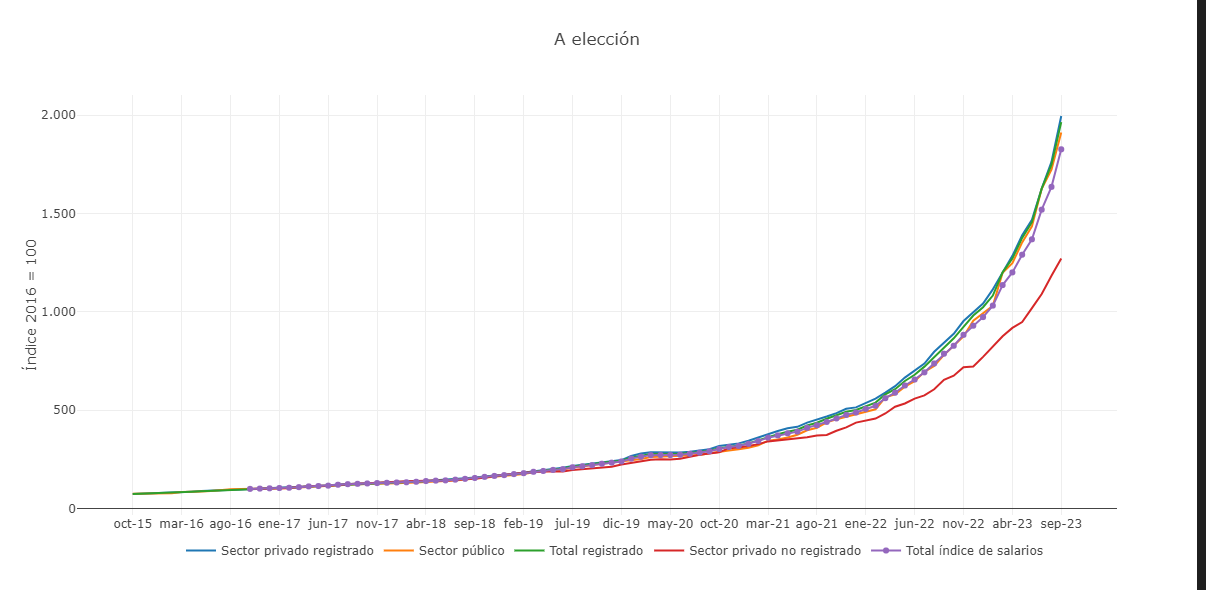

Fuente: https://www.indec.gob.ar/indec/web/Nivel4-Tema-4-31-61

In [1]:
# Importamos las librerías
import pandas as pd
import plotly.graph_objects as go

In [2]:
#Limpiamos la DataFrame
df = pd.read_excel("../data/salarios.xlsx")
#Insertamos una columna al inicio llamada "Fecha"
df.insert(0, "Fecha", df["Mes"].apply(lambda x: x[:3].lower()) + "-" + df["Año"].astype(str).apply(lambda x: x[2:]))
df

,Fecha,Año,Mes,Sector privado registrado,Sector público,Total registrado,Sector privado no registrado,Total índice de salarios
0,oct-15,2015,Octubre,73.97,75.24,74.44,NaN,NaN
1,nov-15,2015,Noviembre,75.95,76.28,76.07,NaN,NaN
2,dic-15,2015,Diciembre,77.36,77.18,77.29,NaN,NaN
3,ene-16,2016,Enero,78.93,77.46,78.38,NaN,NaN
4,feb-16,2016,Febrero,80.04,78.36,79.42,NaN,NaN
...,...,...,...,...,...,...,...,...
91,may-23,2023,Mayo,1389.24,1353.08,1375.74,947.84,1290.46
92,jun-23,2023,Junio,1468.48,1434.49,1455.78,1018.88,1368.71
93,jul-23,2023,Julio,1626.81,1625.51,1626.33,1090.31,1519.50
94,ago-23,2023,Agosto,1762.46,1723.25,1747.82,1183.42,1635.33


In [3]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df["Fecha"], y=df["Sector privado registrado"],
                         name="Sector privado registrado",  line_color ="blue",  hovertemplate="%{y:,.1f}"))

fig.add_trace(go.Scatter(x=df["Fecha"], y=df["Sector público"],
                         name="Sector público", line_color ="yellow", hovertemplate="%{y:,.1f}"))

fig.add_trace(go.Scatter(x=df["Fecha"], y=df["Total registrado"],
                         name="Total registrado", line_color ="green",
                         hovertemplate="%{y:,.1f}"))

fig.add_trace(go.Scatter(x=df["Fecha"], y=df["Sector privado no registrado"],
                         name="Sector privado no registrado", line_color ="red", hovertemplate="%{y:,.1f}"))

fig.add_trace(go.Scatter(x=df["Fecha"], y=df["Total índice de salarios"],
                         name="Total índice de salarios", mode="lines+markers", line_color = "purple",
                         hovertemplate="%{y:,.1f}"))

fig.update_layout(
    title=dict(text="Variacion de los salarios del sector público y privado", x=0.5),
    xaxis=dict(title="Fecha", nticks=25),
    yaxis=dict(title="Índice 2016 = 100", tickformat=",0f"),
    legend=dict(orientation="h", x=0.1, y=-0.1),
    width=1200, height=600
)